![title](img/mnist.png)

# MNIST Dataset

###Introduction to MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. 

It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images.

######https://en.wikipedia.org/wiki/MNIST_database

### Unzipping the dataset and reading in the files

In [1]:
###### Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

In [2]:
#get type which files are formatted in
type(file_content)

bytes

In [3]:
file_content[0:4]

b'\x00\x00\x08\x03'

### What is contained in the gzip file

All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files within the gzip file:

-train-images-idx3-ubyte: training set images 
-train-labels-idx1-ubyte: training set labels 
-t10k-images-idx3-ubyte:  test set images 
-t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.

######http://yann.lecun.com/exdb/mnist/

### THE IDX FILE FORMAT

The IDX file format is a simple format for vectors and multidimensional matrices of various numerical types.
The basic format is

magic number 
size in dimension 0 
size in dimension 1 
size in dimension 2 
..... 
size in dimension N 
data

The magic number is an integer (MSB first). The first 2 bytes are always 0.

The third byte codes the type of the data: 
0x08: unsigned byte 
0x09: signed byte 
0x0B: short (2 bytes) 
0x0C: int (4 bytes) 
0x0D: float (4 bytes) 
0x0E: double (8 bytes)

The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices....

The sizes in each dimension are 4-byte integers (MSB first, high endian, like in most non-Intel processors).

The data is stored like in a C array, i.e. the index in the last dimension changes the fastest. 

######http://yann.lecun.com/exdb/mnist/

In [4]:
#integer value (magic number)
int.from_bytes(file_content[0:4], byteorder='big')

2051

In [5]:
#integer value (number of images)
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [6]:
#integer value (number of rows)
int.from_bytes(file_content[8:12], byteorder='big')

28

In [7]:
#integer value (number of columns)
int.from_bytes(file_content[12:16], byteorder='big')

28

### Reading in an image

Intro to pyplot

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 
Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes.

######https://matplotlib.org/tutorials/introductory/pyplot.html

In [8]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

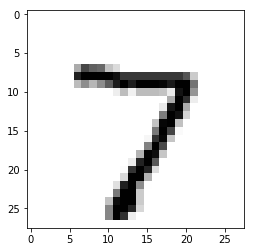

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

### Reading in labels from dataset

In [10]:
# Adapted from: https://docs.python.org/3/library/gzip.html
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [11]:
int.from_bytes(labels[8:9], byteorder="big")

7

The labels are set up in the dataset to address its corresponding images. From the output above we can see that the label 7 matches the image 7. The neural network will output its guess of the image, if it thinks by process of elimination that the image is a 7, the model will then check its corresponding label to check if the model is correct or incorrect.